In [97]:
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile
import sklearn
from sklearn.linear_model import SGDRegressor

# Lung Cancer Classification using the LIDC-IDRI Dataset

*Elias Huber, Filipe Carvalho, Diederik Dekker, Jose Guedes*


# Table of Contents
1. [Introduction](#introduction)
2. [Pylidc](#pylidc)
3. [Pyradiomics](#pyradiomics)
4. [Data Analysis](#data-analysis)
5. [Results](#results)
6. [Conclusion](#conclusion)
7. [References](#references)

## 1. <a id='introduction'>Introduction</a>

The objective of the Laboratory of Artificial Intelligence and Data Science (Lab AI & DC) course
is to provide students with software development methodologies, AI and DC projects, teamwork and
communication through the implementation of projects designed for this purpose. Students should
apply the knowledge obtained from the courses from previous years and research methodologies to
solve the problem. In this first project, the students will use images as input data, namely Computerized Tomography (CT) data, from the human torso, for Lung Cancer classification. 

## 2. <a id='pylidc'>Pylidc</a>

In [66]:
#Create the dataframe from de CSV file
df=pd.read_csv('pylidc/pylidc_csv.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'pylidc_csv.csv'

In [ ]:
#In this first section we present some information on the data
df.head(5)

In [ ]:
#The number of nods for each patient is distrubuted according to the following frequency table 
sum=0
print("Number of nods ", "Relative frequency")
for j in range(1,10):
    sum+=df['N nods'].value_counts()[j]/len(df)
    print("       ",j, "         " ,(df['N nods'].value_counts()[j]/len(df)).round(2))
print("   Total:          ",sum.round(2))

In [ ]:
print('Number of patients')
print(df["Patient_id"].nunique())

In [ ]:
#To better understand the way to classify a nod to be malignant or not we present the related variables 

In [ ]:
print(sns.countplot(x='Malignancy_min',data=df))

In [ ]:
print(sns.histplot(x='Malignancy_mean',data=df,bins=[0,0.5,1.5,2.5,3.5,4.5,5.5]))

In [ ]:
print(sns.countplot(x='Malignancy_max',data=df))

In [ ]:
print(sns.countplot(x='Malignancy_n4',data=df))

In [ ]:
print(sns.countplot(x='Malignancy_n5',data=df))

In [ ]:
#Noticing that the distribution of the mean value and the max value is similar we explored it a litle further 
df['dif']=df['Malignancy_max']-df['Malignancy_mean']

In [ ]:
print(sns.histplot(x='dif',data=df))

In [ ]:
# Despite the similarities between the mean and the max value we decided to create a joint criterion for the 
# malignancy classification. Therefore a node is considered malignant if there is at least one classification of 5 or
# if the mean value over the classifications is at least 3.5

df["Malignancy"]=np.where((df['Malignancy_mean']>= 3.5)|(df['Malignancy_max']==5), True, False)

In [ ]:
df[{'Malignancy_mean','Malignancy_max','Malignancy'}].head(5)

In [ ]:
# Identify the features used to predict the classification of the malignancy of the node
# X - vector of valiables used to predict
# y - target variable

X=df[['N nods','Spiculation_Min', 'Spiculation_Med', 'Spiculation_Max',
       'Internal_Structure', 'Calcification', 'Sphericity', 'Margin_min',
       'Margin_mean', 'Margin_max', 'Lobulation_min', 'Lobulation_mean',
       'Lobulation_max', 'Texture']]
y=df['Malignancy']

In [ ]:
# Devide the dataset in train (80%) and test (20%) subsets
# Define a random state do fix this division

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
# Construction of a decision tree classifier with the stop criterion of 
# at least 0.001 of minimum impurity decrease to avoind overfitting

dt = tree.DecisionTreeClassifier(min_impurity_decrease=0.001)
dt = dt.fit(X_train, y_train)

In [ ]:
# print of the more significant separations with percentage of the subset (train) and proportion for each separation

dt_data = export_graphviz(dt,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
graph = graphviz.Source(dt_data)
display(graph)

In [ ]:
# test of the decision tree obtained using the test subset
y_predict=dt.predict(X_test)

print("Confusion Matrix:")
confusion_matrix(y_test, y_predict)

In [ ]:
print("Accuracy:")
accuracy_score(y_test, y_predict)

In [ ]:
# Random Forest construction with trees similar to the ones obtained previously
# for different values of hyperparameter - number of features (max_features) 

rf = RandomForestClassifier(max_features=1,min_impurity_decrease=0.001)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#print("Number of featrures: ", 1 ," Accuracy: ", accuracy)
best=1
best_ac=accuracy
x_rf=[1]
y_rf=[accuracy]
    
for i in range(2,10):
    rf = RandomForestClassifier(max_features=i,min_impurity_decrease=0.001,n_estimators=100)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #print("Number of featrures: ", i ," Accuracy: ", accuracy)
    x_rf.append(i)
    y_rf.append(accuracy)
    if(accuracy>best_ac):
        best=i
        best_ac=accuracy

#print("Number of featrures: ", best ," Accuracy: ", best_ac)

In [ ]:
# Evaluate the hyperparameter and identify the best value for the accuracy

s = pd.Series(y_rf,x_rf)
plt.title('Accuracy for different number of features')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')

s.plot.line()  
print("Best number of features: ", best ," with accuracy=", best_ac)

In [ ]:
# print of the more significant separations with percentage of the subset (train) and proportion for each separation
# for the two first trees

rf = RandomForestClassifier(max_features=best,min_impurity_decrease=0.001)
rf.fit(X_train, y_train)

for i in range(2):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
# Knn construction for different values of hyperparameter - number of neighbors (n_neighbors) 


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#print("Number of neighbors: ","1", "Accuracy: ", accuracy)
best=1
best_ac=accuracy
x_knn=[1]
y_knn=[accuracy]

for i in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #print("Number of neighbors: ",i, "Accuracy: ", accuracy)
    x_knn.append(i)
    y_knn.append(accuracy)
    if(accuracy>best_ac):
        best=i
        best_ac=accuracy

In [ ]:
# Evaluate the hyperparameter and identify the best value for the accuracy

s = pd.Series(y_knn,x_knn)
plt.title('Accuracy for different number of neighbors')
plt.xlabel('K')
plt.ylabel('Accuracy')

s.plot.line()  
print("Best number of neighbors: ", best ," with accuracy=", best_ac)

## 3. <a id='pyradiomics'>Pyradiomics</a


#### Feature extraction
Code for feature extraction using pyradiomics and dependencies: dcm2niix and SimpleITK. We built a docker image for running the pyradiomics-dcm.py script that is available on the pyradiomics github under labs. The script was still experimental and outdated so we had to make adjustments in the script and dockerfile to make it run. If you want to install the docker container yourself we can provide the working dockerfile. 
The Feature extraction uses the pylidc library and to channel directories and read out the corresponding segmentation and icom files for each patient. These then get passed to the pyradiomics docker container with the experimental script for evaluation. 
The result is a vector with 1574 features. These are put together with metadata and saved inside a csv file.

In [ ]:
#Function that calculates features using the pyradiomics-dcm.py script from the pyradiomics GIT
def get_features():
    start_time = time.time()
    # put path of dataset here
    parent_dir = r"C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\Images+seg\manifest-1698154951594"
    patient_dicom_path_mounted = r"/data/Images+seg/manifest-1698154951594/LIDC-IDRI"
    # get path of LIDC-IDRI directionary
    data_dir = os.path.join(parent_dir, "LIDC-IDRI")
    # give directory where docker saves files
    docker_save_dir = r"C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD"
    # give the hash of the pyradiomnics docker
    docker_hash = r"d95ce08239e3182d8631d3492a5e4a32096d28285c3d2f10dd570d7e6d06fd01"
    # path to the features dict
    features_dict = r"/data/test/featuresDict_IBSIv7.tsv"
    # pyradiomics save folder
    pyradiomics_midsave_path = r"/data/pyradiomics converter test"
    # temporal dir
    temp_dir = r"C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\test\temp file"
    parameter_file = r"C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\test\Pyradiomics_Params_test.yaml"
    data = pd.read_csv(r"C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\test\features.csv")
    df = pd.read_excel(r"C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\test\nodule_counts_by_patient.xlsx")
    df = df.drop(df.columns[[4, 5]], axis=1)
    df.columns = ['Patient_ID', 'Total_Nodule_Count', 'NodG3','NodL3']
    dataframe = pd.DataFrame(
        columns=['Patient_ID', 'Nodule', ' Annotation', 'Subtlety', 'InternalStructure', 'Calcification', 'Sphericity',
                 'Margin', 'Lobulation', 'Spiculation', 'Texture', 'Malignancy'])
    backup = 0
    iteration_counter = 1
    for p_id in df['Patient_ID']:

        print("Patient " + str(p_id) + "Processing")
        if os.path.isdir(os.path.join(data_dir, str(p_id))) == False:
            print("Patient " + str(p_id) + " not found")
            continue  # if the patient folder doesn't exist, skip it

        scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == p_id).first()
        nods = scan.cluster_annotations()

        # path to the patient folder
        patient_dir = os.path.join(data_dir, str(p_id))
        # path to dicom ct-scans of patient
        patient_dicom_path = scan.get_path_to_dicom_files()

        patient_folders = os.path.join(patient_dir, os.listdir(patient_dir)[0])
        if len(os.listdir(patient_folders))==1:
            shutil.rmtree(os.path.join(patient_dir, os.listdir(patient_dir)[0]))
            patient_folders = os.path.join(patient_dir, os.listdir(patient_dir)[0])
            print("wrong folder removed!")

        # listing all the folders from a patient
        patient_seg_folders = os.listdir(patient_folders)
        for folder in patient_seg_folders:
            if "evaluations" in folder:
                shutil.rmtree(os.path.join(patient_folders,folder))
        patient_seg_folders = os.listdir(patient_folders)
        # saving the dicom images folder path
        # get all seg folders for nodules later


        #if scan is None: # if the scan is not available we continue
        #    continue

        nod = 1
        annot = 0
        for nodule in nods:
            for ann in nodule:
                if annot >= len(patient_seg_folders):
                    continue
                backup += 1 #backupcounter

                iteration_counter += 1
                seg_folder = os.path.join(patient_folders, patient_seg_folders[annot+1])

                # check how many files are in the segmentation folder
                seg_files = os.listdir(seg_folder)
                if len(seg_files) <= 0:
                    # add a row with NaN values to the dataframe
                    data.loc[len(data)] = [None] * len(data.columns)
                # iterating over each segmentation file
                for file in os.listdir(seg_folder):
                    if file.endswith(".dcm"):
                        seg_file_path = os.path.join(seg_folder, file)
                        print("docker run -v \"" + docker_save_dir + ":/data\" " + docker_hash + " --input-image-dir \"/data/" + os.path.relpath(patient_dicom_path, docker_save_dir).replace(chr(92),"/") +  "\" --input-seg-file \"/data/" + os.path.relpath(seg_file_path, docker_save_dir).replace(chr(92),"/") + "\" --output-dir \"" + pyradiomics_midsave_path + "\" --volume-reconstructor dcm2niix --features-dict \"/data/" + os.path.relpath(features_dict, docker_save_dir).replace(chr(92),"/") + "\" --temp-dir \"/data/" + os.path.relpath(temp_dir, docker_save_dir).replace(chr(92),"/") + "\" --correct-mask --parameters \"/data/" + os.path.relpath(parameter_file, docker_save_dir).replace(chr(92),"/") + "\"")
                        os.system("docker run -v \"" + docker_save_dir + ":/data\" " + docker_hash + " --input-image-dir \"/data/" + os.path.relpath(patient_dicom_path, docker_save_dir).replace(chr(92),"/") +  "\" --input-seg-file \"/data/" + os.path.relpath(seg_file_path, docker_save_dir).replace(chr(92),"/") + "\" --output-dir \"" + pyradiomics_midsave_path + "\" --volume-reconstructor dcm2niix --features-dict \"/data/" + os.path.relpath(features_dict, docker_save_dir).replace(chr(92),"/") + "\" --temp-dir \"/data/" + os.path.relpath(temp_dir, docker_save_dir).replace(chr(92),"/") + "\" --correct-mask --parameters \"/data/" + os.path.relpath(parameter_file, docker_save_dir).replace(chr(92),"/") + "\"")

                        try:
                            testdata = pd.read_csv(r"C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\test\temp file\Features\1.csv")
                            #print(testdata)
                            # append data to features.csv
                            #print(data.info())
                            #data = data.append(testdata)
                            data = pd.concat([data, testdata], ignore_index=True)
                            #print(data)


                        except:
                            # append a row with NaN values to the dataframe
                            data.loc[len(data)] = [None] * len(data.columns)
                            thisdir = os.getcwd()
                            os.chdir(parent_dir)
                            # write to a log file the patient name, the seg folder name and the file name
                            log = open("log.txt", "a")
                            log.write("Failed to extract features from: " + os.getcwd() + "\n")
                            log.write("SEG File: " + file + "\n\n")
                            os.chdir(thisdir)
                            continue
                        # delete temp folder
                        os.system("rmdir /s /q temp")
                        print("\n\n")
                    else:
                        # also append a row with NaN values to the dataframe
                        data.loc[len(data)] = [None] * len(data.columns)

                # create feature vector
                feature = list(ann.feature_vals())
                feature.insert(0, annot)
                feature.insert(0, nod)
                feature.insert(0, p_id)
                dataframe.loc[len(dataframe)] = feature

                thisdir = os.getcwd()

                # create a backup of the dataframes every 10 iterations (every 5 annotations)
                if backup % 10 == 0:
                    current_time = time.time()
                    runtime = (current_time - start_time)/60
                    print('Iteration: ' + str(iteration_counter) + '-----Backup create------------time:' + str(runtime))
                    os.chdir(r"C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\test\Backups")

                    data.to_csv("pyradiomicsBackup.csv", index=False)
                    dataframe.to_csv("pylidcBackup.csv", index=False)

                    df1 = pd.read_csv("pylidcBackup.csv")
                    df2 = pd.read_csv("pyradiomicsBackup.csv")

                    df3 = pd.concat([df1, df2], axis=1)
                    df3.to_csv("total_data_obliterationBackup.csv", index=False)
                os.chdir(thisdir)

                annot += 1
            nod += 1
    os.chdir(parent_dir)

    dataframe.to_csv("pylidc.csv", index=False)
    data.to_csv("pyradiomics.csv", index=False)

    df1 = pd.read_csv("pylidc.csv")
    df2 = pd.read_csv("pyradiomics.csv")

    # concatenate the columns from both dataframes
    df3 = pd.concat([df1, df2], axis=1)

    df3.to_csv("total_data_obliteration.csv", index=False)

#get_features()

#### Feature Selection
Since the model is inefficient and vulnerable to overfitting if we would use all the GLCM features, we use a statistical p-test (ANOVA) to select the most significant features for the learning model. We also clean and normalize the data so it can be used for ML algorithms.
The following code was used for feature selection.

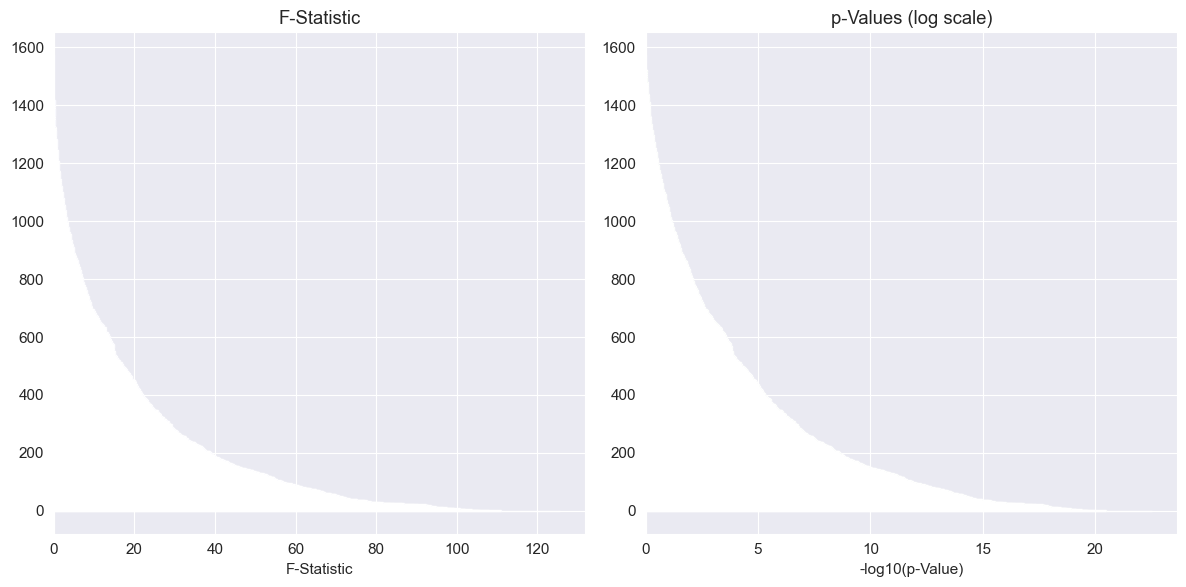

In [94]:
#-loading data-> backup of 02/11/2023
#pylidc data
pl_data = pd.read_csv("Unsorted/Data files/CSV DATA FILES/backup_02_11_2023_afternoon/pylidcBackup.csv")

#pyradiomics data
pr_data = pd.read_csv("Unsorted/Data files/CSV DATA FILES/backup_02_11_2023_afternoon/pyradiomicsBackup.csv")

#Combining pylidc and pyradiomics data
df = pd.concat([pl_data, pr_data], axis=1)
df.to_csv('Python scrips/ML pyradiomics/total_data.csv')

def cleaning_data(df):
    df = df.select_dtypes(include=[int, float])
    df = df.drop(df[df['Malignancy'] == 3].index)
    # Remove rows with NaN values in the "Malignancy" column
    df.dropna(subset=["Malignancy"], inplace=True)
    threshold = df.shape[1] - 10  # 10 or more NaN values to be dropped
    df = df.dropna(thresh=threshold)
    return df
def normalize_data(df):
    normalized_data = (df-df.min())/(df.max()-df.min())
    return normalized_data

def create_category_column(df):
    # Create a new "Category" column based on the "Malignancy" values
    df["Category"] = df["Malignancy"].apply(lambda x: 1 if x in [4, 5] else 0)
    # drop all categories which are not numerical
    df = df.select_dtypes(include=[int, float])
    constant_columns = [col for col in df.columns if df[col].nunique() == 1]
    df = df.drop(columns=constant_columns)
    return df

def get_malignancy_column_dtype(df):
    # Check if the "Malignancy" column exists in the DataFrame
    if "Malignancy" in df.columns:
        malignancy_dtype = df["Malignancy"].dtype
        return malignancy_dtype
    else:
        return "Column 'Malignancy' not found in the DataFrame."

def f_selection_KBest(X,y,k=100):
    X_new = SelectKBest(f_classif, k=k).fit_transform(X, y)
    f_statistic, p_values = f_classif(X, y)
    return X_new, f_statistic, p_values

def f_selection_Percentile(X,y,p=10):
    X_new = SelectPercentile(f_classif, percentile=p).fit_transform(X,y)
    f_statistic, p_values = sklearn.feature_selection.f_classif(X,y)
    return X_new, f_statistic, p_values

def feature_select_plot(f_stat,p_val):
    # Create a DataFrame to store and sort the F-statistic and p-values
    results_df = pd.DataFrame({'F-Statistic': f_stat, 'p-Value': p_val})
    results_df = results_df.sort_values(by='p-Value', ascending=True)
    x_values = np.arange(0, len(f_stat), 1)

    # Plot the sorted F-statistic and p-values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.barh(x_values, results_df['F-Statistic'], color='b')
    plt.xlabel('F-Statistic')
    plt.title('F-Statistic')
    plt.subplot(1, 2, 2)
    plt.barh(x_values, -np.log10(results_df['p-Value']), color='g')
    plt.xlabel('-log10(p-Value)')
    plt.title('p-Values (log scale)')
    plt.tight_layout()
    plt.show()

df = cleaning_data(df)
get_malignancy_column_dtype(df)
df = create_category_column(df)
df_norm = normalize_data(df)

# Creating the ML Dataset
X = df_norm.drop(columns=["Category","Malignancy"])  # X contains all columns except "Category"
y = df["Category"]  # y is the "Category" column
y_alt = df["Malignancy"]

X_new, f_statistic, p_values = f_selection_Percentile(X,y)
feature_select_plot(f_statistic,p_values)
X_new_df = pd.DataFrame(X_new)

X_new_df.to_csv("Python scrips/ML pyradiomics/X.csv", index=False)
y.to_csv("Python scrips/ML pyradiomics/y.csv", index=False)
y_alt.to_csv("Python scrips/ML pyradiomics/y_alt.csv", index=False)

#### Model 1: Linear Support Vector Classifier
Here we use the linear Support Vector Machine Classifier (LinearSVC) algorithm from the scikit package. It minimizes the loss function by updating model parameters in an iterative, stochastic way. We use this classifier is because it is particularly effective for large datasets, as it processes random subsets (mini-batches) of data, making it computationally efficient and suitable for online learning scenarios

The linear Support Vector Machine Classifier (LinearSVC) in scikit-learn is a optimization algorithm for training machine learning models. It efficiently minimizes the loss function by updating model parameters in an iterative, stochastic fashion. This classifier is particularly effective for large datasets, as it processes random subsets (mini-batches) of data, making it computationally efficient and suitable for online learning scenarios.


The Linear Support Vector Classifier (LinearSVC) in scikit-learn is a linear classification model that aims to find the optimal hyperplane to separate different classes in a dataset. It employs a support vector machine (SVM) approach with a linear kernel, making it well-suited for linearly separable or nearly separable data. The model strives to maximize the margin between classes while minimizing classification errors. LinearSVC is versatile, effective for high-dimensional data, and performs well in various classification tasks.

In [77]:
X = pd.read_csv("Python scrips/ML pyradiomics/X.csv")
Y = pd.read_csv("Python scrips/ML pyradiomics/y.csv")
Y = Y.values.ravel()

C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Diederik\OneDrive\Bureaublad\studie tn\Minor vakken Porto\IA CAD\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of

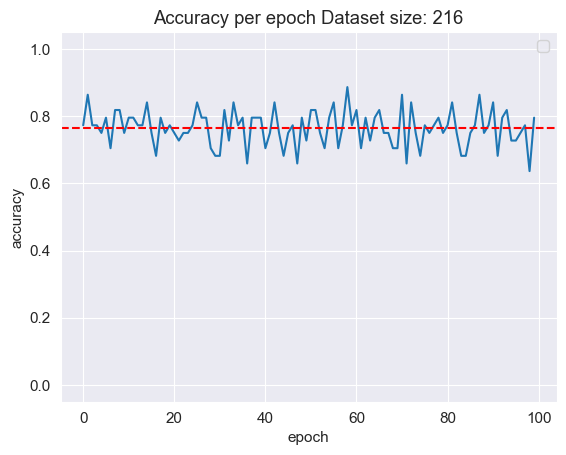

In [96]:
#The model
def LSVC(X,Y,epochs, test_size):
    e = np.arange(0, epochs)
    acc_array = np.array([])
    for i in e:
        # divide training and test data
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
        model = LinearSVC()
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        acc_array = np.append(acc_array, accuracy)
        #print("Accuracy:", accuracy)


    #calculate average accurcy
    mean_acc = np.mean(acc_array)

    #make a plot
    plt.plot(e, acc_array)
    plt.rcParams['font.size'] = '11'
    #plt.figure(figsize=(8, 6), dpi=1000)
    plt.title('Accuracy per epoch, ' + "Dataset size: " + str(len(X)) + ' Nodules')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.ylim(-0.05, 1.05)
    plt.axhline(mean_acc, color='red', linestyle='dashed', label='Mean accuracy')
    plt.show()
    return

#LSVC(X,Y,100, 0.2)

#### Model 2: Stochastic Gradient Descent Regressor

Here we use the Stochastic Gradient Descent Regressor (SGDR) algorithm from the scikit package. It minimizes the loss function by updating model parameters in an iterative, stochastic way. We use this algorithm is because it is particularly effective for large datasets, as it processes random subsets (mini-batches) of data, making it computationally efficient for a big dataset like the LIDC-IDRI dataset.


In [74]:
X = pd.read_csv("Python scrips/ML pyradiomics/X.csv")
Y = pd.read_csv("Python scrips/ML pyradiomics/y_alt.csv")

In [ ]:
#The Model
def SGDR(X,Y,epochs, test_size):
    e = np.arange(0, epochs)
    acc_array = np.array([])
    for i in e:
        # divide training and test data
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        predictions_rounded = [round(num) for num in predictions]
        accuracy = accuracy_score(y_test, predictions_rounded)
        acc_array = np.append(acc_array, accuracy)
        #print("Accuracy:", accuracy)

    #make a plot
    plt.plot(e, acc_array)
    plt.rcParams['font.size'] = '11'
    #plt.figure(figsize=(8, 6), dpi=1000)
    plt.title('Accuracy per epoch ' + "Dataset size: " + str(len(X)))
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    mean_acc = np.mean(acc_array)
    plt.axhline(mean_acc, color='red', linestyle='dashed', label='Mean accuracy')
    plt.show()
    return

#SGDR(X,Y,100, 0.1)

## 4. <a id='data-analysis'>Data Analysis & Results</a>

## 5. <a id='discussion'>Discussion</a>

## 6. <a id='conclusions'>Conclusion</a>

## 7. <a id='references'>References</a>

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html
